In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import scipy.stats as st

In [2]:
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv('dog_rates_tweets-e7.csv', parse_dates=[1])
#print(data[:5])

In [4]:
def extract_rating(text):
    m = re.search('(\d+(\.\d+)?)/10', text)
    rate = None
    if m:
        rate = float(m.group(1))
        if rate > 25:
            rate = None
    return rate

In [5]:
data['rate'] =  data['text'].apply(extract_rating)

In [6]:
data = data.dropna(axis=0, how='any')

In [7]:
def to_timestamp(date):
    return date.timestamp()

In [8]:
data['timestamp'] = data['created_at'].apply(to_timestamp)

In [9]:
fit = st.linregress(data['timestamp'], data['rate'])

In [10]:
fit.slope, fit.intercept 

(5.8046099235166996e-08, -74.197854981627785)

In [11]:
data['residual'] = data.apply(lambda x: x['rate'] - x['timestamp']*fit.slope - fit.intercept, axis=1)

In [12]:
data[:10]

,id,created_at,text,rate,timestamp,residual
7,905222050297643008,2017-09-06 00:12:09,b'Here is a doggo before and after being prese...,13.0,1.504682e+09,-0.143062
11,905175402502660096,2017-09-05 21:06:47,b'RUPERT OMG I LOVE YOU TOO DO NOT BE DISCOURA...,12.0,1.504671e+09,-1.142416
19,905098956430086144,2017-09-05 16:03:01,b'Say hello to Rush. He discovered a secret sn...,12.0,1.504653e+09,-1.141358
22,905079268476145665,2017-09-05 14:44:47,b'THIS \xf0\x9f\x91\x8f IS \xf0\x9f\x91\x8f WH...,13.0,1.504648e+09,-0.141086
33,904495094014861312,2017-09-04 00:03:29,"b""This is Lucy. She's trying to learn how to s...",12.0,1.504509e+09,-1.133001
38,904363433650515968,2017-09-03 15:20:19,b'RT @GadGooner: 13/10 would park on this leve...,13.0,1.504477e+09,-0.131179
45,904128876116410369,2017-09-02 23:48:16,"b""This is Sawyer. He discovered a way to make ...",13.0,1.504421e+09,-0.127933
61,903288181222772736,2017-08-31 16:07:39,"b""This is Bentley. He's very puptective of his...",13.0,1.504221e+09,-0.116298
66,903047250515025922,2017-08-31 00:10:16,b'Meet Lily. This is where she goes when the s...,13.0,1.504163e+09,-0.112964
71,902923889638072321,2017-08-30 16:00:05,b'This is Misha. She waves goodbye to her owne...,14.0,1.504134e+09,0.888743


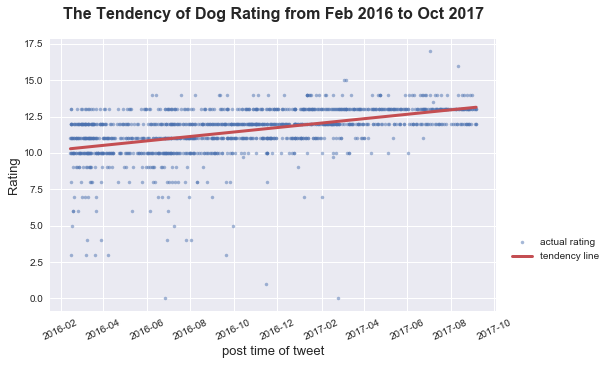

In [111]:

plt.figure(figsize=(8, 5))
plt.xticks(rotation=25)
plt.plot(data['created_at'], data['rate'], 'b.', alpha=0.5)
plt.plot(data['created_at'], data['timestamp']*fit.slope + fit.intercept, 'r-', linewidth=3)
plt.legend(["actual rating","tendency line"], bbox_to_anchor=(1.25,0.3))

plt.title("The Tendency of Dog Rating from Feb 2016 to Oct 2017", fontweight="bold", fontsize = 16, y=1.05)
plt.xlabel("post time of tweet",fontsize = 13)
plt.ylabel("Rating",fontsize = 13)
plt.savefig('a.jpeg', bbox_inches='tight')
plt.show()

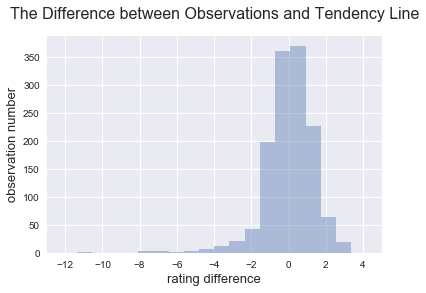

In [122]:

sns.distplot(data['residual'], bins=20, kde=False, color="b")
plt.title("The Difference between Actual Ratings and Tendency Line",fontsize = 16,y=1.05)
plt.xlabel("rating difference",fontsize = 13)
plt.ylabel("number",fontsize = 13)
plt.savefig('b.jpeg', bbox_inches='tight')
plt.show()

In [15]:
fit.pvalue

7.795784752632768e-77

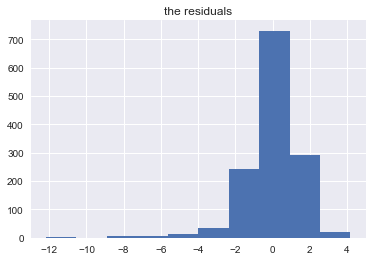

In [16]:
plt.hist(data['residual'])
plt.title("the residuals")
plt.show()

In [17]:
print(st.normaltest(data['residual']).pvalue)

6.87098131544e-157
